In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ../source/

/home/ivan/Projects/pigs-main/source


In [3]:
from PIL import Image
from pigs import Pigs
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# from hilbertcurve.hilbertcurve import HilbertCurve
# import numpy as np

# X = np.array(
#     [[12, 15,  5,  0],
#      [ 3, 11,  3,  7],
#      [ 9,  3,  5,  2],
#      [ 4,  7,  6,  8]])

# p = 3
# N = 2
# hilbert_curve = HilbertCurve(p, N)

# # compute indexes for 2D -> 1D transform
# indexes = np.zeros((4*4,N), dtype='int')
# for i in range(4*4):
#     coords = hilbert_curve.point_from_distance(i)
#     indexes[i,:] = coords

# # transform 
# vector = [X[x,y] for x,y in indexes]

In [5]:
# def hilbert_flatten(array, dim=2, p=2):
#     N = array.shape[0]
#     hilbert_curve = HilbertCurve(p, dim)
#     # compute indexes for 2D -> 1D transform
#     indexes = np.zeros((N*N,dim), dtype='int')
#     for i in range(N*N):
#         coords = hilbert_curve.point_from_distance(i)
#         indexes[i,:] = coords
#     return np.array(indexes)

In [6]:
# flatted_image = np.array(image)[index[:,0], index[:,1]]
# flatted_image = flatted_image.astype(float)/255

In [7]:
# def rgb_pos_kernel(rgb1,rgb2,pos1,pos2,N,beta):
#     l2 = np.sqrt((rgb1[0] - rgb2[0])**2 + 
#                  (rgb1[1] - rgb2[1])**2 + 
#                  (rgb1[2] - rgb2[2])**2) #+ 
# #                  ((pos1[0] - pos2[0])/N)**2 + 
# #                  ((pos1[1] - pos2[1])/N)**2)
#     print(l2)
#     return np.exp(-beta * l2)

In [4]:
def rgb_pos_kernel(rgb1,rgb2,pos1,pos2,N,beta):
    pos = (pos1[0] - pos2[0])/(N**2) 
    l2 = np.sqrt(((rgb1[0] - rgb2[0]) + pos)**2 + 
                 ((rgb1[1] - rgb2[1]) + pos)**2 + 
                 ((rgb1[2] - rgb2[2]) + pos)**2)
#     print(l2)
    return np.exp(-beta * l2)
beta = 2
(rgb_pos_kernel((0.01,1,0.3), (1,0,0), (10,10), (5,1), 10, beta),
rgb_pos_kernel((0,0,0), (1,1,1), (0,0), (9,9), 10, beta),
rgb_pos_kernel((1,1,1), (1,1,1), (9,9), (9,9), 10, beta))

(0.054792396229339534, 0.022917126622610678, 1.0)

In [5]:
# image = np.array(image)
# image.ravel()
ii = np.arange(N)
jj = ii.reshape(64,64, order='F').flatten()
plt.plot(ii)
plt.plot(jj)

NameError: name 'N' is not defined

In [20]:
im_size = (2**6,2**6)
image = Image.open('flower.jpg')
# image = Image.open('flower.jpg').convert('LA')
image = image.resize(im_size)

flatted_image = np.array(image).astype(float)#.flatten() / 255
flatted_image = flat_image.reshape((im_size[0]*im_size[1],3))

N = flatted_image.shape[0]
beta = 10

G = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i > j: #and abs(i-j) < N//3:
            i1 = flatted_image[i]
            j2 = flatted_image[j]
            G[i,j] = rgb_pos_kernel(i1, j2, (ii[i],jj[i]), (ii[j],jj[j]), N, beta)
G += G.T
for i in range(N): G[i,i]=1

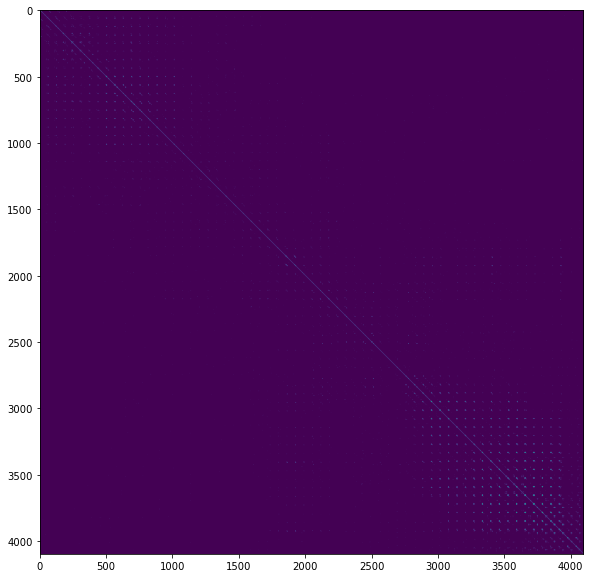

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(G)

In [22]:
# im_size = (64,64)

# image = Image.open('pigs.jpg').convert('LA')
# image = Image.open('pigs.jpg').convert('LA')
# image = image.resize(im_size)

pig = Pigs(stop=1e-3, verbose=True, beta=1000)


In [23]:
# %%time
# # 01.
# flat_image = pig.flatter(image)
# # 02.
# gram = pig.compute_gram(flat_image)#, diag_size=2000)


In [24]:
gram=G

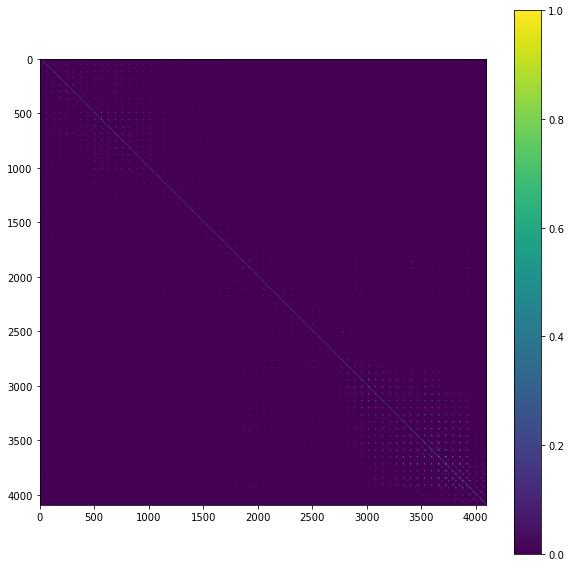

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(gram)
plt.colorbar()

In [26]:
degree, laplace = pig.compute_LD(gram)


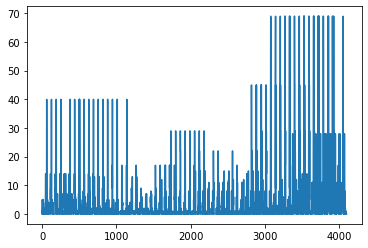

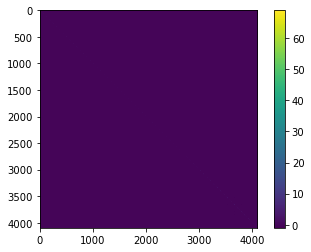

In [27]:
plt.figure()
plt.plot(degree)
plt.figure()
plt.imshow(laplace)
plt.colorbar()

In [33]:
%%time
# # 04.
x, root_node = pig.linear_solver(degree, laplace)
# # 05.

Root node: 3650
CPU times: user 8.87 s, sys: 1.03 s, total: 9.9 s
Wall time: 1.32 s


In [37]:
img_vector = flatted_image

(4095,)

In [38]:
%%time
threshold, ir = pig.compute_IR_threshold(x, gram, degree)
print(threshold, ir )
mask = pig.generate_mask(flatted_image, x, threshold, root_node)

-3.4523434147029102e+78 3.715585199301298e-93


ValueError: could not broadcast input array from shape (445) into shape (8637)

In [31]:
plt.plot(mask)

NameError: name 'mask' is not defined

In [ ]:
mask

In [32]:
hilbert_curve = HilbertCurve(10, 2)
distances = hilbert_curve.distances_from_points(index)
index = [(a,b) for a,b in index]
back = {k:v for k, v in zip(index, distances)}

image_ = np.zeros(im_size)

for i,j in index:
        k = back[(i,j)]
        image_[i,j] = mask[k]
# mask.resize(im_size)
# img = np.resize(flat_image, im_size)

NameError: name 'HilbertCurve' is not defined

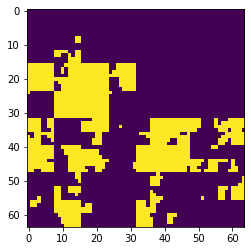

In [187]:
plt.imshow(image_, 'Greens')
# plt.imshow(np.ma.masked_where(mask, img), 'Reds')

In [87]:
'''Second iteration'''
mask = pig.generate_mask(img_vector, x, threshold, root_node)

In [136]:
mask.shape, flat_image.shape

((1600,), (1600,))

In [143]:
mask = mask == 2
# mask = mask.flatten()

In [169]:
# mask = np.logical_not(mask)

subimg1 = flat_image[mask]
subgram1 = gram[mask][:, mask]
# new_beta=len(subimg1) #/ 3.14
# subgram1 = pig.compute_gram(subimg1, beta=new_beta)
subidxs1 = np.where(mask)

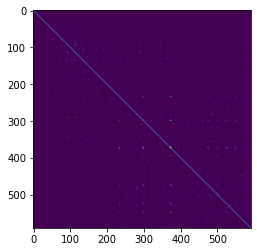

In [170]:
plt.imshow(subgram1)

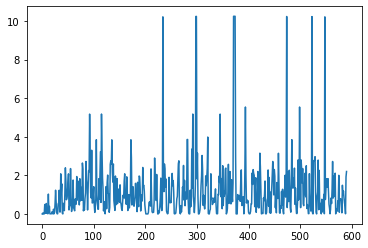

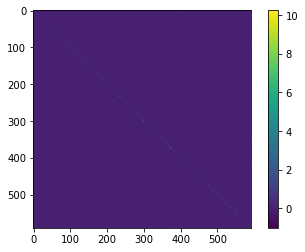

In [171]:
degree, laplace = pig.compute_LD(subgram1)
plt.figure()
plt.plot(degree)
plt.figure()
plt.imshow(laplace)
plt.colorbar()

In [172]:
%%time
# # 04.
x, root_node = pig.linear_solver(degree, laplace)
# # 05.

Root node: 373
CPU times: user 3.4 ms, sys: 28.4 ms, total: 31.8 ms
Wall time: 5.68 ms


In [173]:
img_vector = subimg1

In [174]:
%%time
threshold, ir = pig.compute_IR_threshold(x, subgram1, degree)
print(threshold, ir )
mask_1 = pig.generate_mask(img_vector, x, threshold, root_node)

1568438.0926625966 2.241568858294585e-07
CPU times: user 47.1 ms, sys: 204 µs, total: 47.4 ms
Wall time: 43.5 ms


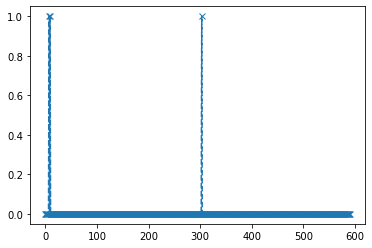

In [175]:
plt.plot(mask_1, 'x--')

In [176]:
mask_1.shape, subidxs1[0].shape

((591,), (591,))

In [177]:
new_mask = np.zeros_like(mask, dtype=int)

new_mask[subidxs1[0]] = mask_1.astype(int) + 1


In [178]:
new_mask.resize(im_size)
new_mask.shape

(40, 40)

In [179]:
np.unique(new_mask)

array([0, 1, 2])

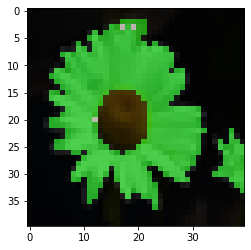

In [180]:
plt.imshow(image)
plt.imshow(new_mask, 'nipy_spectral', alpha=0.7)
plt.show()

In [131]:
mask = new_mask.flatten()

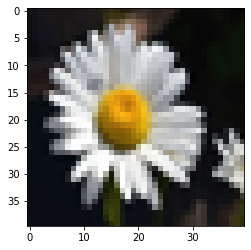

In [132]:
plt.imshow(image)

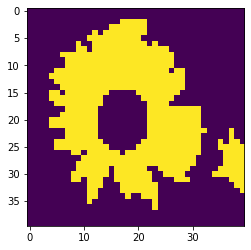

In [142]:
plt.imshow(new_mask ==2)